#### Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout

## Fragebogen

#### Reading fragebogen information

In [2]:
fragebogen = pd.read_csv('./fragebogen.csv', names=["id",
                                                    "nummer", 
                                                    "titel", 
                                                    "schlagwoerter", 
                                                    "erscheinungsjahr",
                                                    "autoren", 
                                                    "originaldaten",
                                                    "anmerkung",
                                                    "freigabe",
                                                    "checked",
                                                    "wordleiste",
                                                    "druck",
                                                    "online",
                                                    "publiziert",
                                                    "fragebogen_typ_id",])

fragebogen.drop(["id","schlagwoerter","erscheinungsjahr","autoren","originaldaten","anmerkung","freigabe",
                 "checked","wordleiste","druck","online","publiziert","fragebogen_typ_id",], inplace=True, axis=1)

fragebogen.set_index("nummer", drop=True, inplace=True)

In [3]:
fragebogen.info()

<class 'pandas.core.frame.DataFrame'>
Index: 762 entries, 1 to ETir.28
Data columns (total 1 columns):
titel    762 non-null object
dtypes: object(1)
memory usage: 11.9+ KB


In [4]:
fragebogen.head()

,titel
nummer,
1,Fragebogen 1: Kopf (1)
2,Fragebogen 2: Die Osterwoche (1)
3,Fragebogen 3: Die Osterwoche (2)
4,Fragebogen 4: Kopf (2)
5,Fragebogen 5: Zeit zwischen Ostern und Fronlei...


#### Filtering the original fragebogen

In [5]:
fragebogen.tail()

,titel
nummer,
ETir.24,24. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.25,25. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.26,26. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.27,27. Ergänzungsfragebogen zum Tiroler Fragebuch
ETir.28,28. Ergänzungsfragebogen zum Tiroler Fragebuch


In [6]:
fragebogen[fragebogen.titel.str.startswith('Fragebogen')].tail()

,titel
nummer,
105,Fragebogen 105: Verkehr
106,Fragebogen 106: Wasser
107,Fragebogen 107: Gewerbe
108,Fragebogen 108: Gewerbe
109,Fragebogen 109: Gewerbe


In [7]:
fb_original = fragebogen[fragebogen.titel.str.startswith('Fragebogen')]

#### Extracting information from the fragebogen titel

In [8]:
regex = r'([Fragebon]+)\s{1}([0-9]+)[:]{1}([,A-ZÄÖÜa-zäöüß0-9.\s]+)[,\s]*([=\-\(\)\sA-ZÄÖÜa-zäöüß0-9]*)'

fb_original.titel.str.extract(regex).head()
#fb_original.titel.str.extract(regex).tail()

,0,1,2,3
nummer,,,,
1,Fragebogen,1,Kopf,(1)
2,Fragebogen,2,Die Osterwoche,(1)
3,Fragebogen,3,Die Osterwoche,(2)
4,Fragebogen,4,Kopf,(2)
5,Fragebogen,5,Zeit zwischen Ostern und Fronleichnam,


In [9]:
my_stopwords = ['die', 'und', 'der', 'ihr', 'ihre', "i", "ii"]

In [10]:
def clean_list(input_list):
    output_list = [elem.strip(string.punctuation).title() for elem in input_list]
    output_list = [elem for elem in output_list if (elem.lower() not in my_stopwords)]
    output_list = [elem for elem in output_list if not elem.isnumeric()]
    return output_list 

In [16]:
fb_original['number'] = fb_original.titel.str.extract(regex)[1].str.strip()
fb_original['headwords'] = fb_original.titel.str.extract(regex)[2].str.strip()
fb_original['headwords_list'] = fb_original.headwords.str.split().apply(clean_list)
fb_original['series'] = fb_original.titel.str.extract(regex)[3].str.strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [17]:
fb_original.head()

,titel,headwords,headwords_list,series,number
nummer,,,,,
1,Fragebogen 1: Kopf (1),Kopf,[Kopf],(1),1
2,Fragebogen 2: Die Osterwoche (1),Die Osterwoche,[Osterwoche],(1),2
3,Fragebogen 3: Die Osterwoche (2),Die Osterwoche,[Osterwoche],(2),3
4,Fragebogen 4: Kopf (2),Kopf,[Kopf],(2),4
5,Fragebogen 5: Zeit zwischen Ostern und Fronlei...,Zeit zwischen Ostern und Fronleichnam,"[Zeit, Zwischen, Ostern, Fronleichnam]",,5


In [18]:
#print(fb_original.index)
print(fb_original.number.unique())
print()
print(fb_original.headwords.unique())
print()
print(fb_original.series.unique())

['1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16'
 '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30'
 '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44'
 '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71' '72'
 '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85' '86'
 '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99' '100'
 '101' '102' '103' '104' '105' '106' '107' '108' '109']

['Kopf' 'Die Osterwoche' 'Zeit zwischen Ostern und Fronleichnam'
 'Menschl. Haar und Bart' 'Hochzeit' 'Nase, Ohr' 'Auge'
 'Besiedelung, Flur' 'Feld, Feldbestellung' 'Körper' 'Körperteile'
 'Hautkrankheiten' 'Brotbacken' 'Weißgebäck' 'Gliedmaßen, Arm' 'Arm'
 'Hand' 'Finger' 'Schneiderei' 'Kleidung' 'Bewegung' 'Farbe'
 'Zeit zwischen Mittsommer und Neujahr' 'Tod'
 'Gruß, Wunsch, Bitte und Dank' 'Jagd' 'Wald und Forstwirtschaft' 'Tiere'
 'Kind

In [19]:
fb_original.groupby("headwords")["number"].apply(lambda group_series: group_series.tolist()).reset_index().head(10)

,headwords,number
0,1. Erdoberfläche,[104]
1,Arm,[33]
2,Auge,[13]
3,"Besiedelung, Flur","[14, 15]"
4,Bewegung,"[42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]"
5,Bierbrauerei,[101]
6,"Blutsverwandtschaft, Altersstufen",[87]
7,Brotbacken,"[28, 29, 30]"
8,Das Pferd,[76]
9,Der Bauernhof,"[92, 93]"


In [20]:
#https://matplotlib.org/2.0.2/api/colors_api.html

G = nx.Graph()

for concept_list in fb_original.headwords_list:
    for concept in concept_list:
        G.add_node(concept, color='white')
        
for questionnaire in fb_original.number:
    G.add_node(questionnaire, color='yellow')
    
for idn in fb_original.index:
    for concept in fb_original.loc[idn, 'headwords_list']:
        G.add_edge(concept, fb_original.loc[idn, 'number'], length = 10)

In [21]:
#print(G.nodes)
print(G.edges)

[('Kopf', '1'), ('Kopf', '4'), ('Osterwoche', '2'), ('Osterwoche', '3'), ('Zeit', '5'), ('Zeit', '54'), ('Zeit', '68'), ('Zeit', '72'), ('Zwischen', '5'), ('Zwischen', '54'), ('Zwischen', '72'), ('Ostern', '5'), ('Ostern', '72'), ('Fronleichnam', '5'), ('Menschl', '6'), ('Haar', '6'), ('Bart', '6'), ('Hochzeit', '7'), ('Hochzeit', '8'), ('Hochzeit', '9'), ('Hochzeit', '10'), ('Hochzeit', '11'), ('Nase', '12'), ('Ohr', '12'), ('Auge', '13'), ('Besiedelung', '14'), ('Besiedelung', '15'), ('Flur', '14'), ('Flur', '15'), ('Feld', '16'), ('Feld', '17'), ('Feld', '18'), ('Feld', '19'), ('Feldbestellung', '16'), ('Feldbestellung', '17'), ('Feldbestellung', '18'), ('Feldbestellung', '19'), ('Körper', '20'), ('Körper', '21'), ('Körper', '22'), ('Körper', '23'), ('Körperteile', '24'), ('Körperteile', '77'), ('Körperteile', '78'), ('Hautkrankheiten', '25'), ('Hautkrankheiten', '26'), ('Hautkrankheiten', '27'), ('Brotbacken', '28'), ('Brotbacken', '29'), ('Brotbacken', '30'), ('Weißgebäck', '31'),

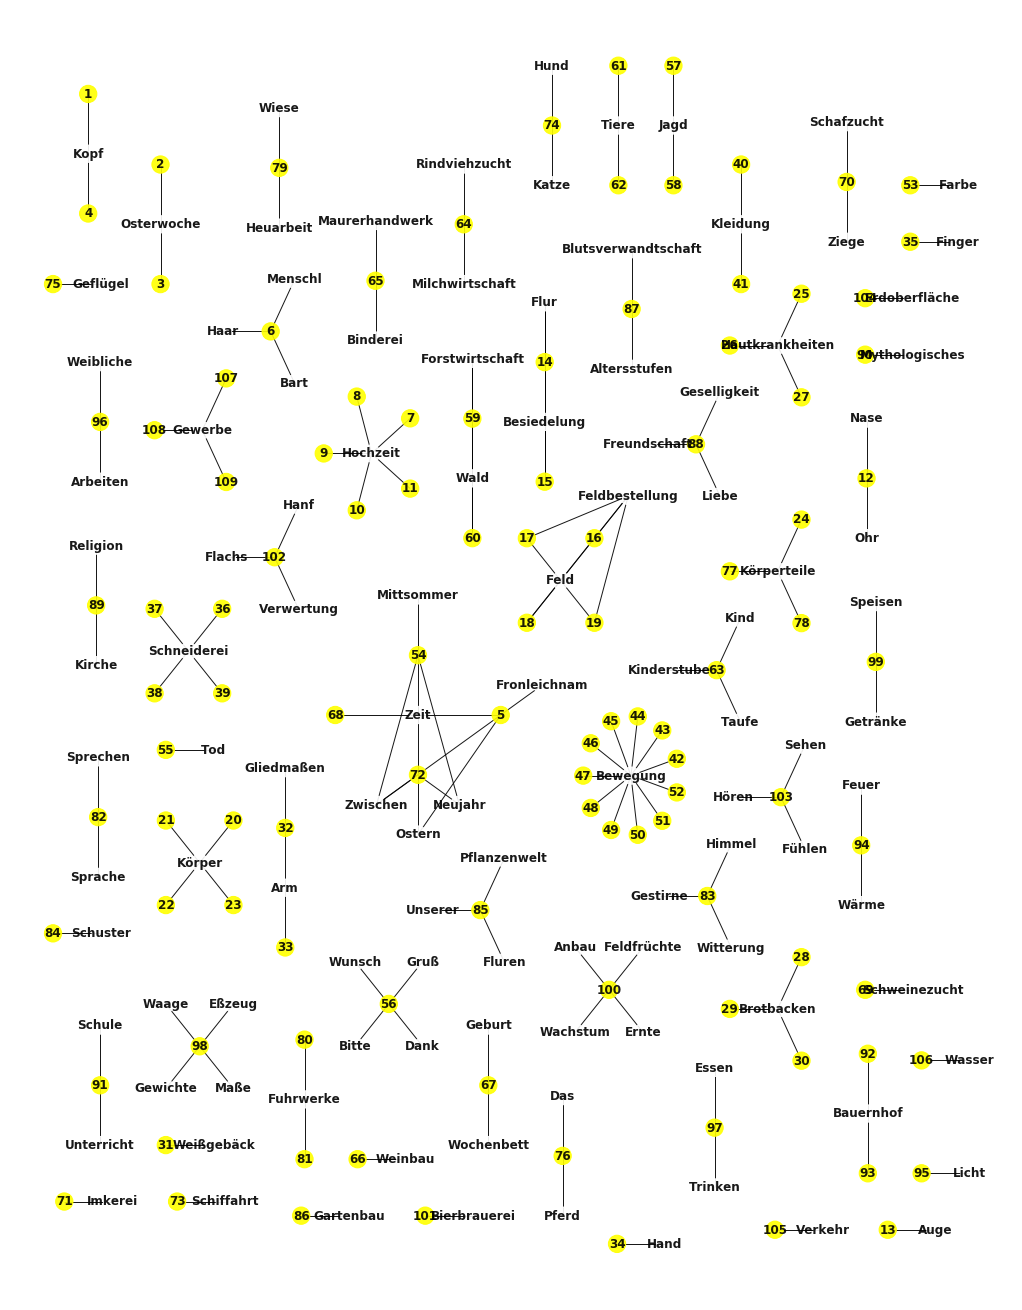

In [22]:
#https://stackoverflow.com/questions/48240021/alter-edge-length-and-cluster-spacing-in-networkx-matplotlib-force-graph

plt.figure(figsize=(14,18))

#pos = nx.spring_layout(G)
#pos = graphviz_layout(G)
pos = graphviz_layout(G, prog='twopi', args='')


nx.draw(G, 
        pos,
        #width=5,
        alpha=0.9,
        #cmap=plt.get_cmap('viridis'),
        node_color=nx.get_node_attributes(G,'color').values(), 
        with_labels=True,
        font_weight='bold', 
        #font_color='white',
       )


plt.show()

## Frage

#### Reading frage information

In [23]:
frage = pd.read_csv('./frage.csv', names=["id", "fragebogen_id","nummer", "original_frage", "kurzfrage", "originaldaten"])

In [24]:
frage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24382 entries, 0 to 24381
Data columns (total 6 columns):
id                24382 non-null int64
fragebogen_id     24382 non-null int64
nummer            24382 non-null object
original_frage    24382 non-null object
kurzfrage         17413 non-null object
originaldaten     6528 non-null object
dtypes: int64(2), object(4)
memory usage: 1.1+ MB


#### Filtering the relevant collumns and the original questionnaires

In [25]:
frage.drop(["id", "originaldaten", "kurzfrage"], axis=1, inplace=True)
frage = frage[frage.fragebogen_id <= 109]
frage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 3 columns):
fragebogen_id     16744 non-null int64
nummer            16744 non-null object
original_frage    16744 non-null object
dtypes: int64(1), object(2)
memory usage: 523.2+ KB


In [28]:
frage.head()

,fragebogen_id,nummer,original_frage
0,1,A1,"Kopf: Kopf, Haupt; auch scherzh./übertr."
1,1,A2,Kopf: Kopf/Haupt (in urspr. Bed.) in Vergl./Ra...
2,1,A3,Kopf: Kopf/Haupt (übertr.) in Vergl./Ra. (das ...
3,1,A4,"Kopf: schöner, ebenmäßig gebauter Kopf (Christ..."
4,1,A4a,"Kopf: häßlicher, unebenmäßiger Kopf"


In [29]:
frage.tail()

,fragebogen_id,nummer,original_frage
16739,109,602,Gewerbe: (Gehalts-)Zulage
16740,109,603,"Gewerbe: Abzug v. Gehalt, Pl."
16741,109,604,"Gewerbe: sonstige heute noch lebende, bodenstä..."
16742,109,605,"Gewerbe: abgekommene, bodenständige Berufe, di..."
16743,109,606,"Gewerbe: bodenständige FN, die vermutl. auf ei..."


#### Extracting information from the frage "original_frage" field

In [75]:
#regex = r'([Fragebon]+)\s{1}([0-9]+)[:]{1}([,A-ZÄÖÜa-zäöüß0-9.\s]+)[,\s]*([=\-\(\)\sA-ZÄÖÜa-zäöüß0-9]*)'
regex = r'([A-ZÄÖÜa-zäöüß]+)[:]{1}([A-ZÄÖÜa-zäöüß0-9=,;:\-\(\)\.\?\s]+)'

#frage.original_frage.str.extract(regex).head(70)

In [76]:
frage['main_theme'] = frage.original_frage.str.extract(regex)[0]
frage['question_words'] = frage.original_frage.str.extract(regex)[1].str.strip()
frage['question_words_list'] = frage.question_words.str.split()
#frage['question_words_list'] = frage.question_words_list.apply(clean_list)
frage.head()

,fragebogen_id,nummer,original_frage,main_theme,question_words,question_words_list
0,1,A1,"Kopf: Kopf, Haupt; auch scherzh./übertr.",Kopf,"Kopf, Haupt; auch scherzh.","[Kopf,, Haupt;, auch, scherzh.]"
1,1,A2,Kopf: Kopf/Haupt (in urspr. Bed.) in Vergl./Ra...,Kopf,Kopf,[Kopf]
2,1,A3,Kopf: Kopf/Haupt (übertr.) in Vergl./Ra. (das ...,Kopf,Kopf,[Kopf]
3,1,A4,"Kopf: schöner, ebenmäßig gebauter Kopf (Christ...",Kopf,"schöner, ebenmäßig gebauter Kopf (Christuskopf...","[schöner,, ebenmäßig, gebauter, Kopf, (Christu..."
4,1,A4a,"Kopf: häßlicher, unebenmäßiger Kopf",Kopf,"häßlicher, unebenmäßiger Kopf","[häßlicher,, unebenmäßiger, Kopf]"


In [77]:
print(len(frage[frage['question_words_list'].isnull()]['original_frage']))
frage[frage['question_words_list'].isnull()]['original_frage']

1676


112      Palmso.: Palmsonntag, Palmtag, Blumentag, Blum...
113                                     Palmso.: Palmweihe
114      Palmso.: Palmbuschen, -gerte, -besen, -wedel/-...
115        Palmso.: Palmbuschen best. Größe, Ausdr. hiefür
117      Palmso.: Palmkätzlein v. Palmbuschen als Schut...
119      Palmso.: Palmbuschenträger; Unfug, der v. d. P...
120      Palmso.: geweihte Haselnußstecken (Hexenbesen,...
121      Palmso.: gilt Palmsonntag noch als Beichttag d...
122      Palmso.: die Passion, das lange Evangelium; We...
123      Palmso.: welche Gebetbücher werden am Palmsonn...
124      Palmso.: Palmesel; auch als SpottN?; Ra. (aufg...
125      Palmso.: Palmeselfahrt; wann/von wem veranstal...
126      Palmso.: wird bei d. Palmeselfahrt e. Christbi...
127      Palmso.: Lieder, die bei Palmeselfahrt gesunge...
128      Palmso.: die Grintbüßerin, Person, die am Palm...
129      Palmso.: wie heißt Woche vor d. Palmsonntag? h...
136      Gründo.: Gründonnerstag, Mendeltag, heiliger P.

In [54]:
frage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16744 entries, 0 to 16743
Data columns (total 6 columns):
fragebogen_id          16744 non-null int64
nummer                 16744 non-null object
original_frage         16744 non-null object
main_theme             15068 non-null object
question_words         15068 non-null object
question_words_list    15068 non-null object
dtypes: int64(1), object(5)
memory usage: 915.7+ KB
